# Problem Statement

A new restaurant owner wants to open a successful venture in the city but want to get a fair idea about the factors affecting the establishment of different types of resturants as he is unsure about the ideal location, cuisine type, and pricing strategy. 

How can we use our dataset about Restaurants in the market to predict demand, identify promising locations, and optimize pricing for the new restaurant?

We will tackle some questions that can reveal some guiding actionable insights for our resturant owner:


**I aim to leverage this data to enhance my skill set, actively seeking opportunities to contribute value throughout the process.💪**

### Other Potential Areas for Exploration:

**Market Research and Understanding:**

* **Identify popular cuisines and restaurant types:** Analyze the distribution of cuisines and restaurant types to understand what Bangalorean diners prefer.
* **Explore neighborhood trends:** Examine which cuisines and types are prevalent in different areas, uncovering unique culinary identities.
* **Benchmark pricing strategies:** Analyze average costs per person for different cuisines and locations to inform your own pricing decisions.
* **Investigate online ordering and delivery trends:** Analyze the prevalence of online ordering and delivery options to understand customer preferences and potential delivery service gaps.

**Customer Insights and Recommendations:**

* **Build restaurant recommendation systems:** Recommend restaurants to users based on their preferences, location, budget, and cuisine choices.
* **Predict restaurant ratings:** Develop models to predict how users might rate a restaurant based on various factors.
* **Analyze user reviews:**  Perform sentiment analysis to understand customer satisfaction and identify areas for improvement for restaurants.
* **Identify hidden gems:** Uncover popular but under-the-radar restaurants based on factors like high ratings but fewer reviews.

**Business-Specific Applications:**

* **Target advertising and marketing campaigns:** Identify relevant customer segments for specific restaurants based on their cuisine, location, and online behavior.
* **Identify optimal locations for new restaurants:** Analyze existing successful restaurants and demographic data to predict promising locations for new ventures.
* **Competitor analysis:** Compare your restaurant's performance to competitors based on ratings, reviews, and online presence.

**Machine Learning Applications:**

* **Clustering restaurants:** Cluster restaurants based on various factors like cuisine, price range, location, and rating to identify distinct market segments.
* **Building chatbots:** Train chatbots to answer customer queries about restaurants based on the dataset information.

----

In [1]:
# Importing our dependencices
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
from IPython.display import Image

# Data Collection 

##### Once we articulated a problem that we can potentially solve with data the next obvious thing to do is to **GET DATA**.

### About Data Collection.
- We gan get data from many sources we can chose one or a combinaion of them based on our problem use case.

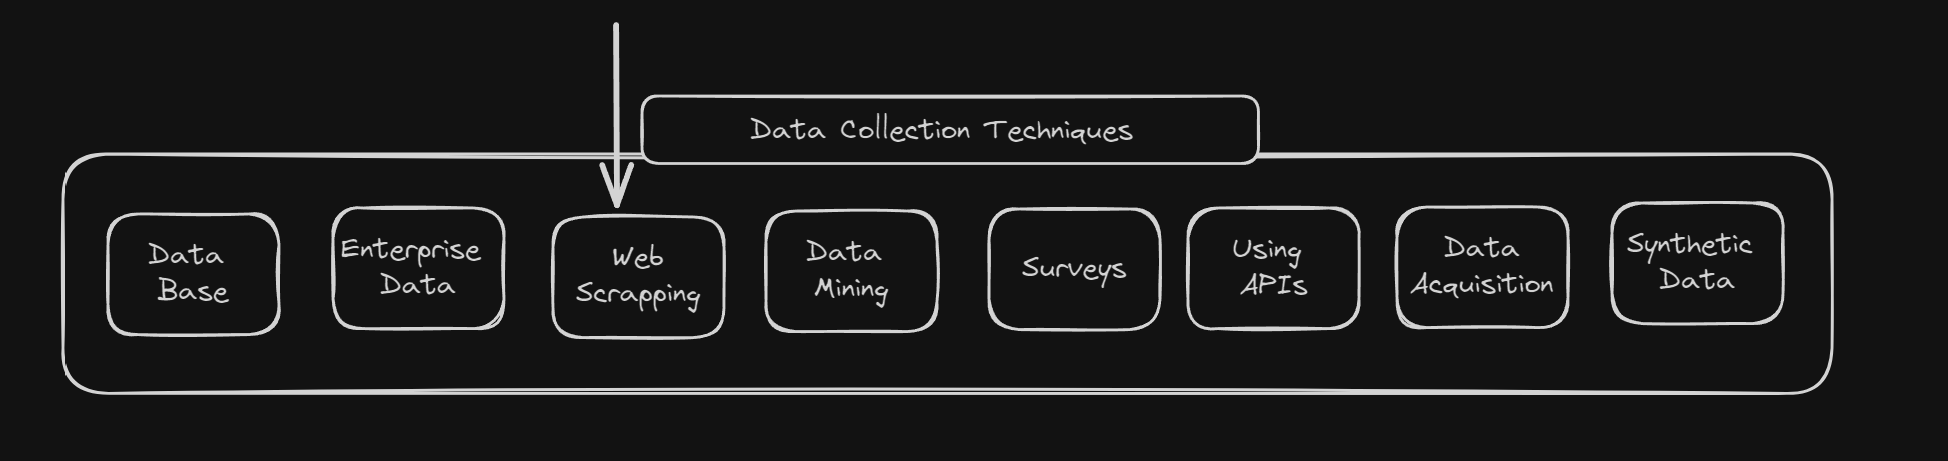

In [2]:
# Define the file path
image_path = "Attachments/Data Acquisition.png"

# Display the image
Image(filename=image_path)

### Usually We do this **Web Scrapping** step ourselves but thatnks to [Himanshu Poddar | Contributor | Kaggle](https://www.kaggle.com/himanshupoddar/datasets) he scraped This dataset from Zomato for us.

In [2]:
# Loading data into dataframe
data = pd.read_csv("zomato.csv")

# Data Profiling

### In this phase we aim to make sure we understand our data before any thing else.
- **The first rational step before working with any data is to understand what each column or feature in the dataset represents.**
- Consult domain **experts** or **available documentation** to gain a deeper understanding of the data and its features. 

In [3]:
# Haveing a glance over our data.
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Understading the number  of rows and columns we have in our dataset.
data.shape

(51717, 17)

In [5]:
# What columns do we have.
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

**Columns description**

- **url**
contains the url of the restaurant in the zomato website

- **address**
contains the address of the restaurant in Bengaluru

- **name**
contains the name of the restaurant

- **online_order**
whether online ordering is available in the restaurant or not

- **book_table**
table book option available or not

- **rate**
contains the overall rating of the restaurant out of 5

- **votes**
contains total number of rating for the restaurant as of the above mentioned rate

- **phone**
contains the phone number of the restaurant

- **location**
contains the neighborhood in which the restaurant is located

- **rest_type**
restaurant type

- **dish_liked**
dishes people liked in the restaurant

- **cuisines**
food styles, separated by comma

- **approx_cost(for two people)**
contains the approximate cost for meal for two people

- **reviews_list**
list of tuples containing reviews for the restaurant, each tuple 

- **menu_item**
contains list of menus available in the restaurant

- **listed_in(type)**
type of meal

- **listed_in(city)**
contains the neighborhood in which the restaurant is listed


In [6]:
# Having a quick sammary about data types of each feature we have.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### About Data Types
##### Understanding the type of data you are working with is crucial for selecting the appropriate statistical techniques and visualization methods.
- Here we follow a Top-Down approach investigation.

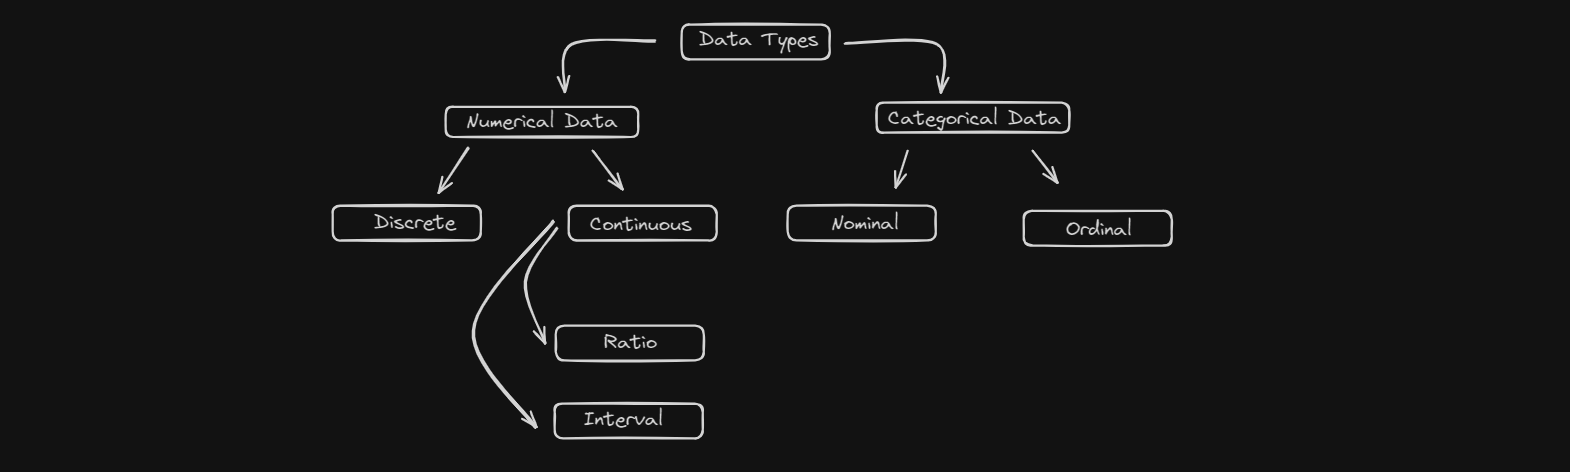

In [3]:
# Define the relative file path
relative_path = "Attachments/Data Types.png"

# Display the image
Image(filename=relative_path)


In [7]:
# Identify Numerical and Categorical features.
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'object']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'object']

# Print results
print("We have {} Numerical Features: {}".format(len(numeric_features), numeric_features))
print("We have {} Categorical Features: {}".format(len(categorical_features), categorical_features))

We have 1 Numerical Features: ['votes']
We have 16 Categorical Features: ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


In [8]:
# Quick view of the feature.
data['votes'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: votes
Non-Null Count  Dtype
--------------  -----
51717 non-null  int64
dtypes: int64(1)
memory usage: 404.2 KB


- Understanding the 'vote' feature as an 'int64' type guides our approach in the Exploratory Data Analysis (EDA).
- We can use Descriptive Statistics and opt for a Bar Chart to visualize the count of each unique value efficiently. This aids in gaining insights into the feature's distribution during analysis.

### Checking the cardinality of our categorical features:
**Cardinality of a categorical variable**: Represent the number of unique categories or levels present within the variable.
- Understanding the composition of our dataset, which largely comprises categorical variables, is crucial.
- One of the initial steps in comprehending these variables is assessing their cardinality, which reveals the number of distinct categories within each.

In [9]:
# Calculate and sort the cardinality (unique values count) for each categorical feature in 'data'.
Cardinality = sorted([{feature :data[feature].nunique() } for feature in categorical_features], key= lambda x: list(x.values())[0])

In [10]:
# Print feature names, unique counts, and data types from the sorted 'Cardinality' list.
for entry in Cardinality:
    feature, unique_count = entry.popitem()
    print(f"{feature}: {unique_count} unique values of type {data[feature].dtype}")


online_order: 2 unique values of type object
book_table: 2 unique values of type object
listed_in(type): 7 unique values of type object
listed_in(city): 30 unique values of type object
rate: 64 unique values of type object
approx_cost(for two people): 70 unique values of type object
location: 93 unique values of type object
rest_type: 93 unique values of type object
cuisines: 2723 unique values of type object
dish_liked: 5271 unique values of type object
name: 8792 unique values of type object
menu_item: 9098 unique values of type object
address: 11495 unique values of type object
phone: 14926 unique values of type object
reviews_list: 22513 unique values of type object
url: 51717 unique values of type object



- Features like  `rest_type`, and `cuisines` having a high number of unique values suggest significant variability in these categories. 
    - This can be useful for understanding the diversity of **restaurant locations**, **types**, and **cuisines** offered.

- Variables such as `online_order` and `book_table` with only two unique values **may be suitable for binary encoding (0 or 1)** in machine learning models, simplifying the representation.


- `listed_in(type)` and `listed_in(city)` provide insights into the types and cities where restaurants are listed. 
    - The number of unique values for these features gives an idea of the **diversity in restaurant listings**.


- The `rate` and `approx_cost(for two people)` variables show a relatively large number of unique values.
    - This implies **a wide range of ratings and costs**, offering detailed **insights into the pricing and rating structure of the restaurants**.


- Features like `cuisines`, `dish_liked`, `name`, and `menu_item` have high **Massive** cardinality, indicating a **diverse set of cuisines**, **preferred dishes** and **menu items**.

- Similarly, the `reviews_list` feature with a high cardinality suggests a **diverse set of reviews**.



# Data Preprocessing
- Before diving into analysis or model building, it's crucial to assess the quality and integrity of the dataset.

### Data Integrity Verification

We observe that both the `rate` and `approx_cost(for two people)` columns contain numerical data but are currently stored as objects. It may be prudent to convert them into appropriate data types to facilitate numerical operations and analysis.

In [11]:
# Extract numerical values of the ratings features
data['rate'] = data['rate'].str.split("/").str[0]
data['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     NaN
51714     NaN
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

<AxesSubplot:xlabel='rate', ylabel='Count'>

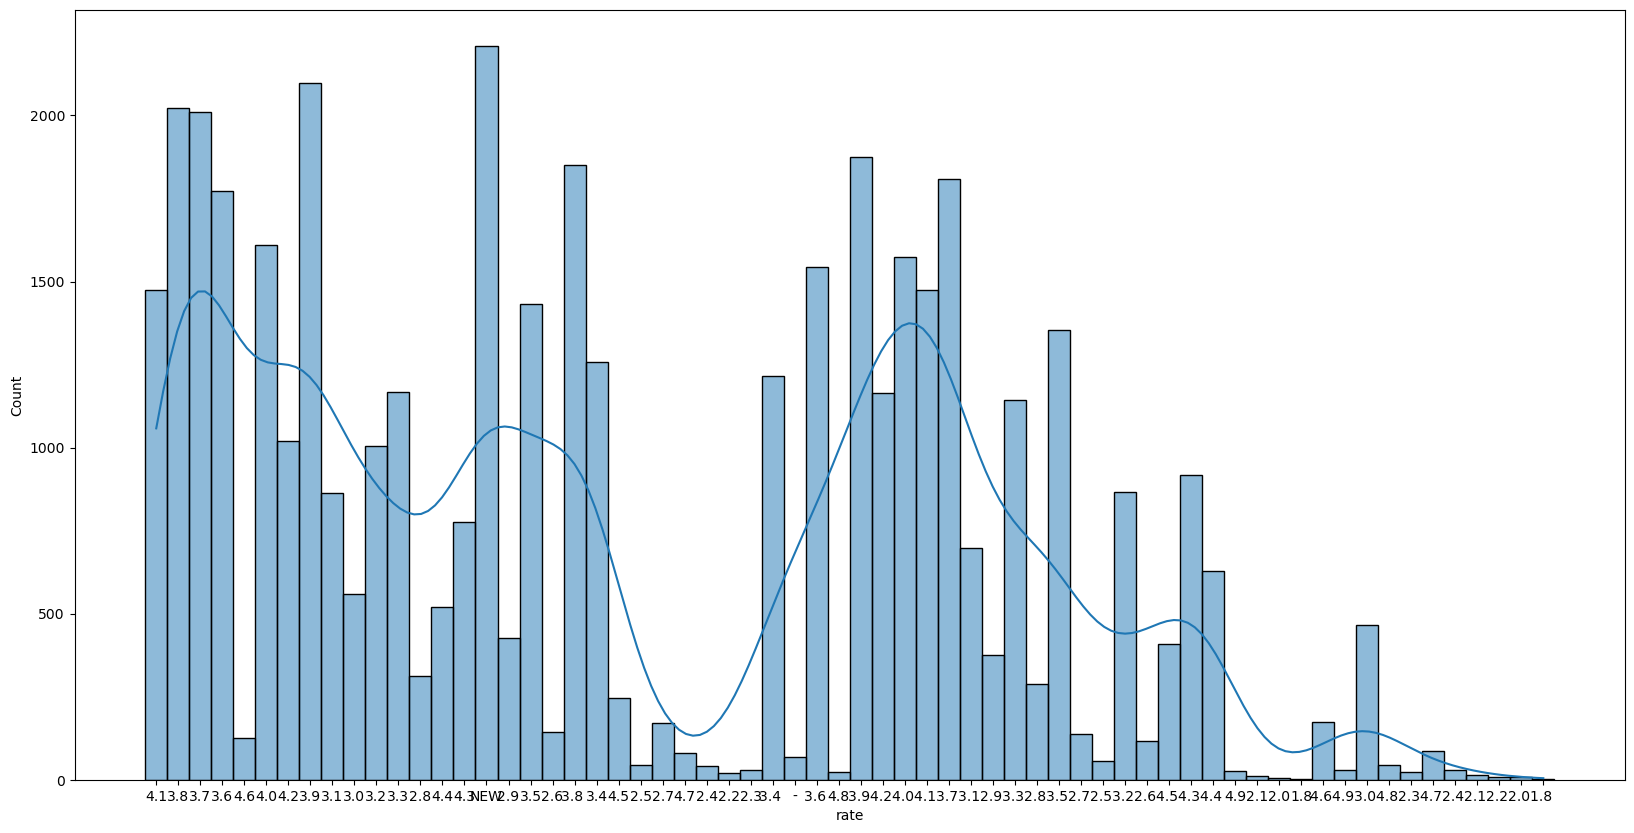

In [12]:
plt.figure(figsize=(20,10))
sns.histplot(data['rate'], kde=True)

In [13]:
# Convert the rating feature into float64 feature
data['rate'] = pd.to_numeric(data['rate'], errors="coerce")
data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

<AxesSubplot:xlabel='rate', ylabel='Count'>

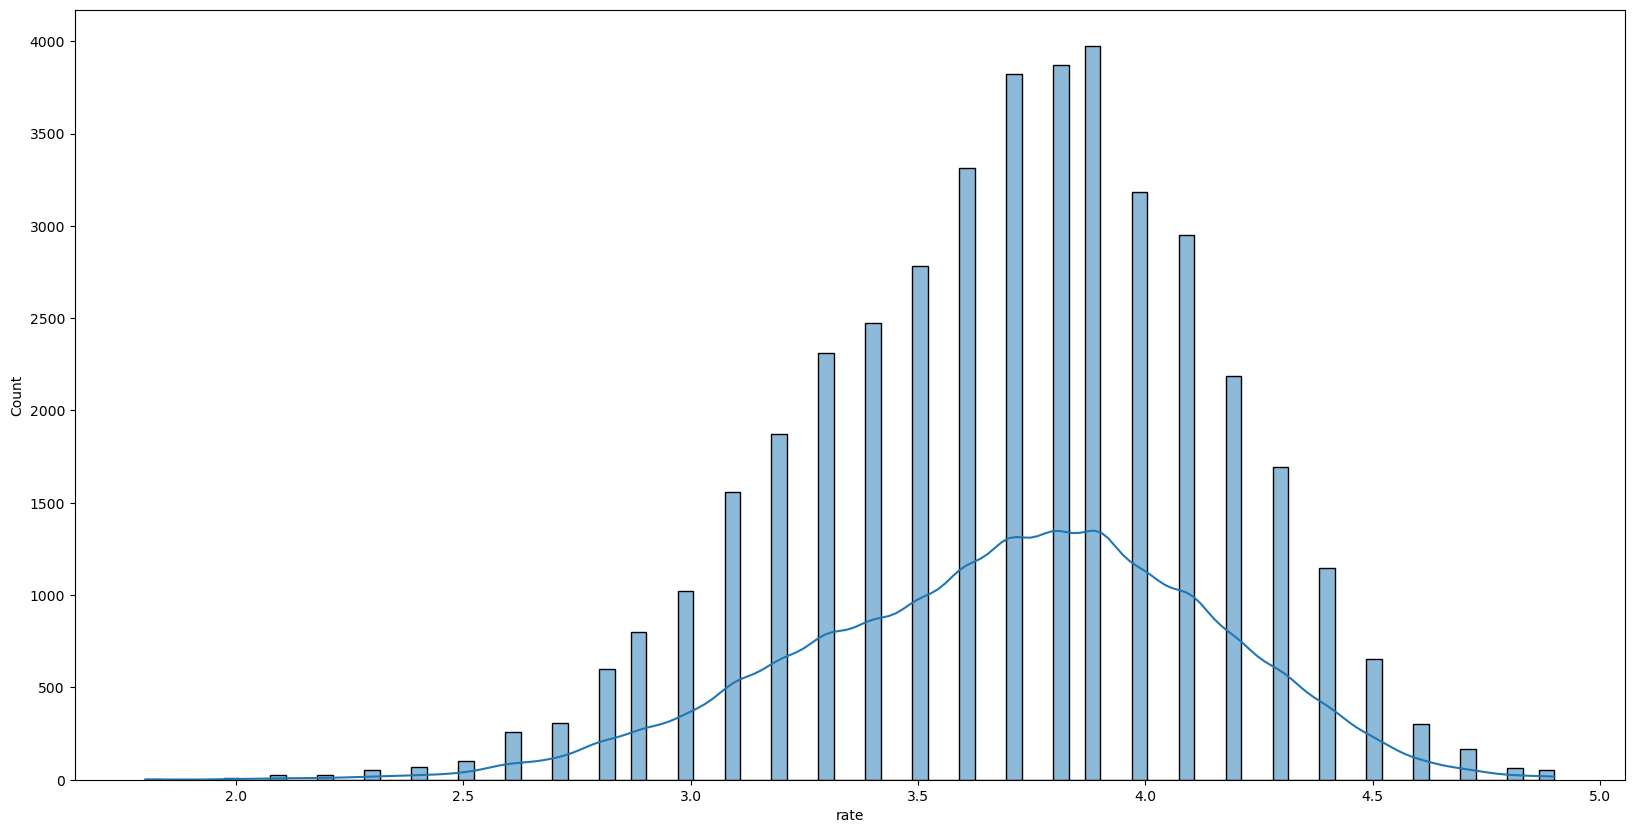

In [14]:
plt.figure(figsize=(20,10))
sns.histplot(data['rate'], kde=True)

In [15]:
# Convert the approx_cost(for two people) feature into float64 feature
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'], errors="coerce")
data['approx_cost(for two people)']

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51712      NaN
51713    600.0
51714      NaN
51715      NaN
51716      NaN
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [16]:
# Convert string representations of lists to actual lists
data['menu_item'] = data['menu_item'].apply(lambda x: eval(x))

# Create a new feature 'menu_variety' containing the count of elements in the list
data['menu_variety'] = data['menu_item'].apply(lambda x: len(x))

In [17]:
data['menu_variety'].value_counts()

0      39617
79        98
54        96
25        96
61        94
       ...  
398        1
281        1
467        1
345        1
573        1
Name: menu_variety, Length: 456, dtype: int64

### Missing data 


Treating **Missing data** is heavily dependent on our understanding of  the reasons behind missing data in the first place. 



In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  44454 non-null  float64
 13  reviews_list    

In [19]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)     7263
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
menu_variety                       0
dtype: int64

> First and foremost we have to understand the processes leading to the missing data in order to select the appropriate course of action.

**Missing Data** Could be:
- Missing Completely at Random **(MCAR)**: Data is missing randomly and **unrelated** to any observed or unobserved variables.

- Missing at Random **(MAR)**: The missingness is **related to observed data** but not to the missing data itself.


- Missing Not at Random **(MNAR)**: The missingness is **related to the missing values themselves**.

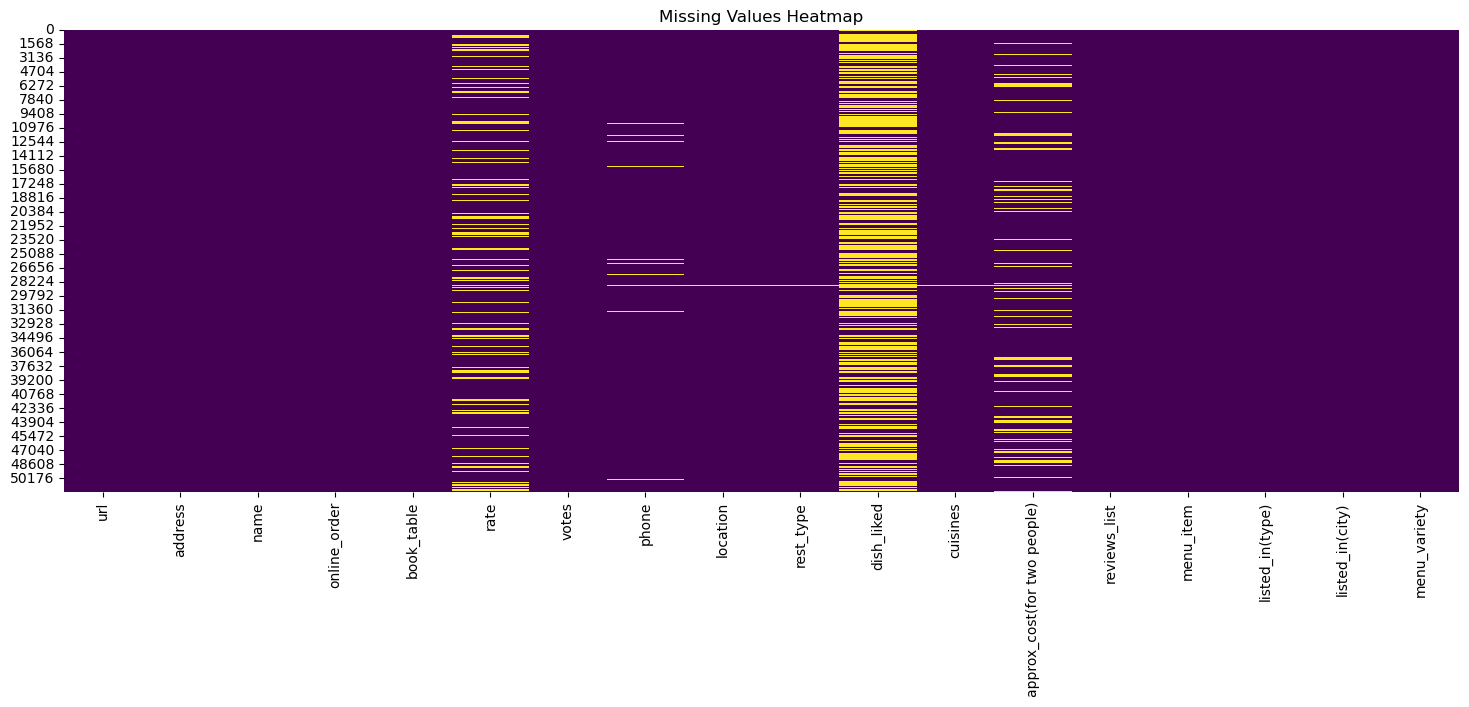

In [20]:
# Create a heatmap For the missng data distribution across variables
plt.figure(figsize=(18, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

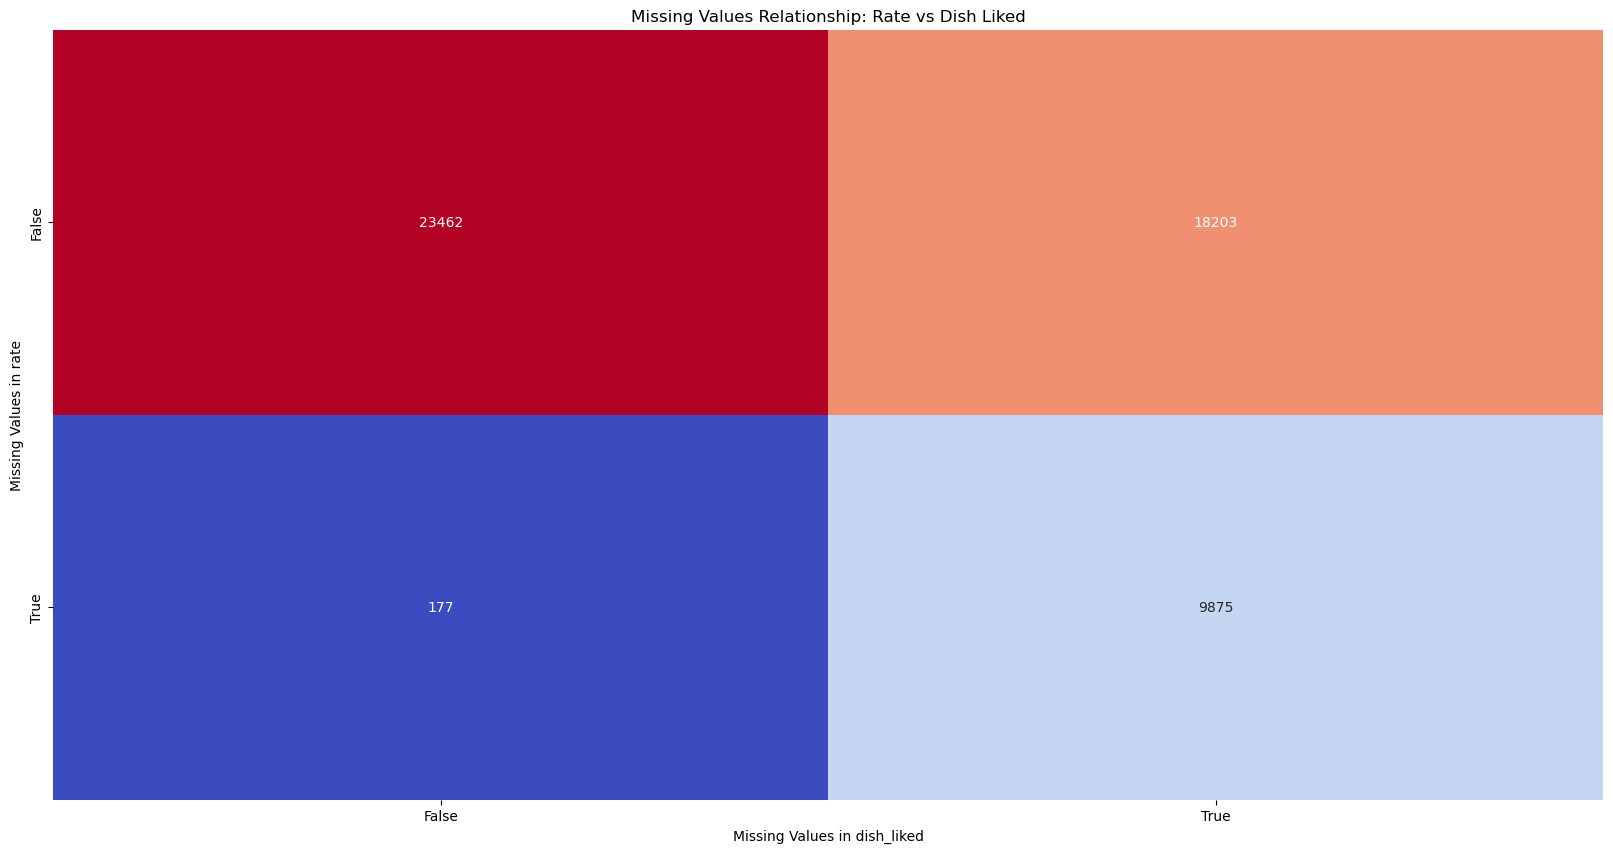

In [21]:
subset_data = data[['rate', 'dish_liked']]

# Creating a cross-tabulation of missing values
cross_tab = pd.crosstab(subset_data['rate'].isnull(), subset_data['dish_liked'].isnull())

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', cbar=False, fmt='d')
plt.title('Missing Values Relationship: Rate vs Dish Liked')
plt.xlabel('Missing Values in dish_liked')
plt.ylabel('Missing Values in rate')
plt.show()


> There's a significant number of records (9875) where both 'rate' and 'dish_liked' columns have missing values.

#### From this, we can infer a potential mechanism behind the missingness:

- The missingness in the 'dish_liked' column may be associated with cases where ratings ('rate') are provided. This could indicate that customers may be less likely to leave comments about liked dishes when they have already provided a rating.

In [22]:
# Calculate the total number of entries
total_entries = len(data)

# Calculate the number of missing values in each column
missing_values_count = data.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values_count / total_entries) * 100

# Display the missing percentage for each column
print("Missing Data Percentage:")
print(missing_percentage)

Missing Data Percentage:
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.436549
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)    14.043738
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
menu_variety                    0.000000
dtype: float64


#### Based on these ratios of missingness and the nature of the feature data types, we may consider the following course of action:

1. **Imputation for `rate` is the most logical course of action**:
- Even given the benefit of deleting cases and variables, the researcher is precluded from the simple solution of using the complete case method, because it results in an inadequate sample size. 


>To decide on the potential mechanism behind the prevelent missingness of the `rate` feature whether those missing values have a pattern within the data we check the corrolation between features to determin if thay could be explained by our observed features.

<AxesSubplot:>

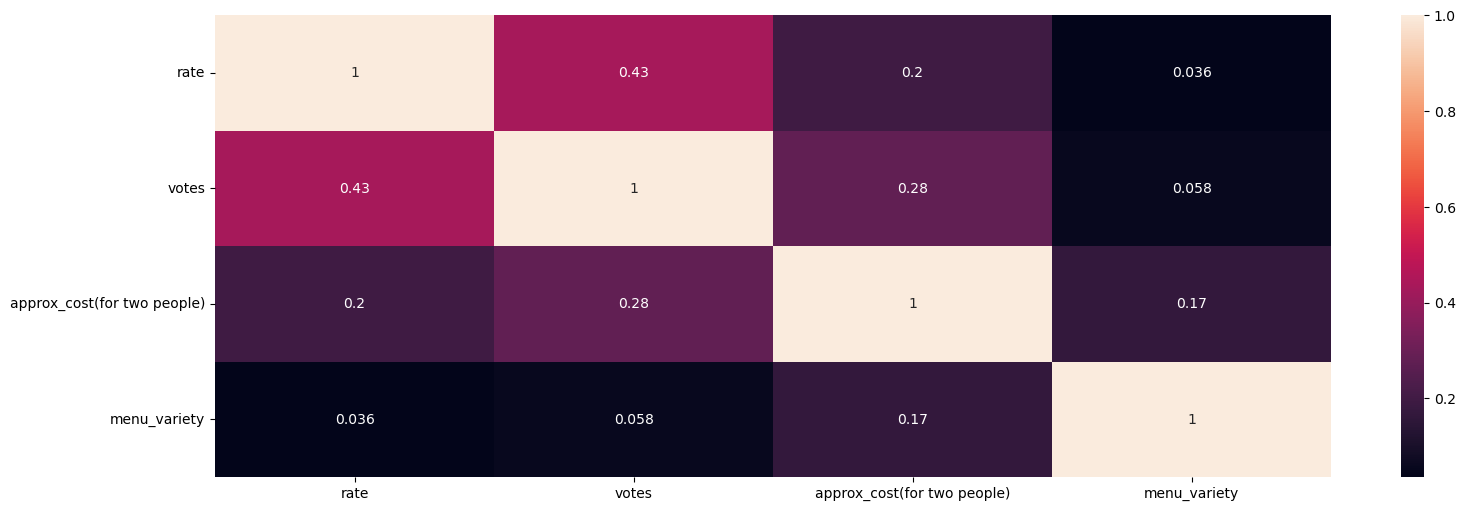

In [23]:
#check the corrolation between features through the corrolaionmatric displayed using heatmap
plt.figure(figsize= (18,6))
sns.heatmap(data=data.corr() ,annot=True)

- This cases shows the degree in which a variable can explain a missing value.
- **EX:** If taller people forgets to completes their age data that can be explained by Hight. 
- **For our case** there is a clear corolation between both the numper of votes and the rate recived.
    - Even though it is important to rememper that  **Correlation = Statistical relationship.** AND **Correlation ≠ causal relationship.**
- This  means that The reason for missing values of the `rate` variable can be explained partially by the `votes` variable, but you can not predict the missing value itself.

#### Based on our analysis so far we can say the missing data in the `rate` variable is **MAR** and Getting an unbiased estimate of the parameters can be done only by modeling the missing data.
>Typical strategies here is to **Impute values** | **Create a dummy variable indicating this values where missing before** 

### Instead of blindly using the `global mean rating`, it's more appropriate to consider the inherent similarities among restaurants of the same chain. By grouping the data by restaurant name and calculating the mean rating for each individual restaurant, we can better handle missing values in a more contextually relevant manner.

In [24]:
# Group data by restaurant name and calculate mean rating for each restaurant
restaurant_mean_ratings = data.groupby('name')['rate'].mean().round(1)

# Fill NaN values in 'rate' column with mean rating corresponding to each restaurant
data['rate'] = data['rate'].fillna(data['name'].map(restaurant_mean_ratings))


In [25]:
data["rate"].isna().sum()

7507

### We observe that there are still `7507` missing values in the dataset. This occurs either when a restaurant has no ratings, and all restaurants with the same name also lack ratings, resulting in a NaN mean rating for that restaurant, or there other values miss placed like text 'NEW' in our case. In such scenarios, we can adopt various strategies:
- Group the remaining restaurants based on factors like location, cuisine, etc., and then compute the average of their ratings to fill in the missing values.
- Alternatively, for simplicity, we can opt to fill the remaining NaN values with the **global mean rating**. However, it's important to note that while this approach provides a quick solution, it may not yield the most accurate representation, especially if aiming for optimization.

In [26]:
# Calculate the mean rating of the entire dataset
mean_rating = round(data['rate'].mean(),1)

# Fill NaN values in 'rate' column with the mean of the entire dataset
data['rate'].fillna(mean_rating, inplace=True)


In [27]:
data["rate"].isna().sum()

0

2. **Imputation for  `approx_cost(for two people)`**:
   - Given the moderate percentage of missing values in 'approx_cost(for two people)', we'll use `Mean` imputation methods to fill in the missing values. This ensures that we retain valuable information while addressing the missingness.

In [28]:
# Impute missing values in 'approx_cost(for two people)' columns
mean_cost = data['approx_cost(for two people)'].mean()
data['approx_cost(for two people)'].fillna(mean_cost, inplace=True)

3. **Drop rows with missing data in `rest_type` and `location` and `cuisines`**:
   - Since the percentage of missing values in the 'rest_type' and 'location' columns is relatively low, dropping rows with missing data in these categorical columns is a reasonable approach. This helps maintain the integrity of the dataset and ensures the availability of crucial information for subsequent analysis.



In [29]:
# Drop rows with missing data in 'rest_type' and 'location' and 'cuisines' columns
data.dropna(subset=['rest_type', 'location', 'cuisines'], inplace=True)


4.  **Drop out the feature of `dish_liked` altogether**:
   - Due to the prevalent missing nature of the 'dish_liked' feature, it is better to drop it out.

In [30]:
# Due to the prelevent missing nature of the dish_like feature it is better to drop it out
data.drop(columns=['dish_liked'], inplace=True)

In [31]:
data.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                          1175
location                          0
rest_type                         0
cuisines                          0
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
menu_variety                      0
dtype: int64

### Outliers

##### Outliers Detection

To effectively detect an outlier, it's crucial to understand what constitutes an outlier:
> **Outliers** are observations characterized by a unique combination of features, setting them apart distinctly from the rest of the data points.

A **univariate outlier** is an extreme value that relates to just one variable.


A greate way to have an over view about the distribution of each individual variable is to use boxplot.
- A boxplot is a method of displaying a distribution of data based off the minimum, maximum lower quartile, upper quartile and the median.


In [32]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),menu_variety
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,0


<AxesSubplot:>

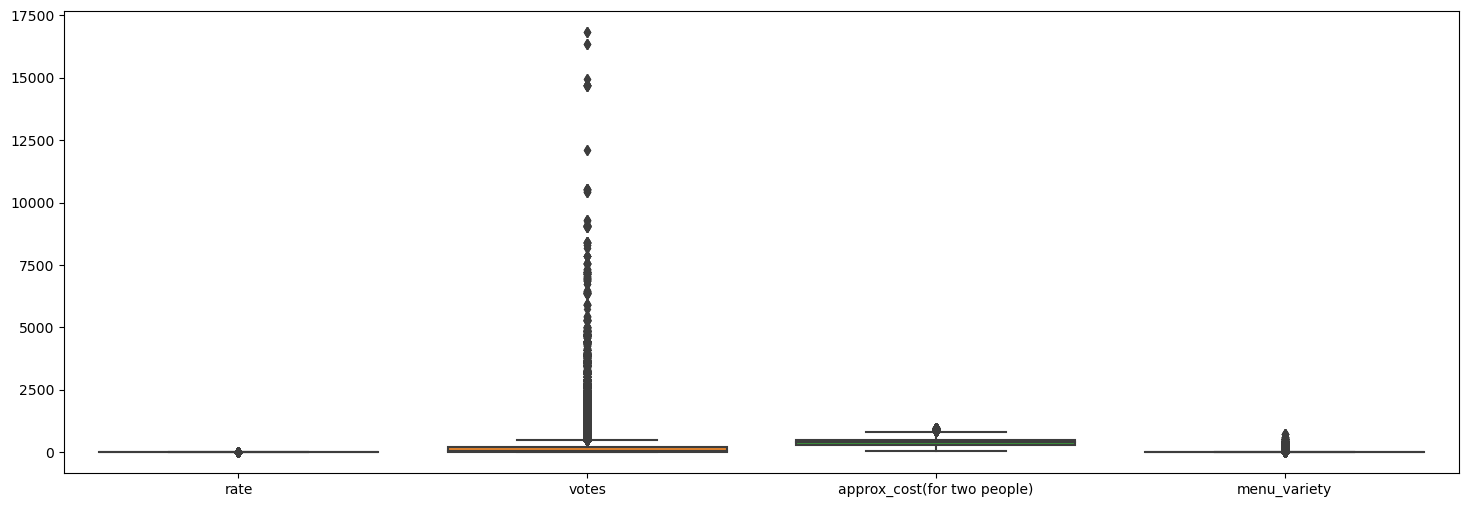

In [33]:
plt.figure(figsize=(18,6))
sns.boxplot(data = data) 

<AxesSubplot:ylabel='rate'>

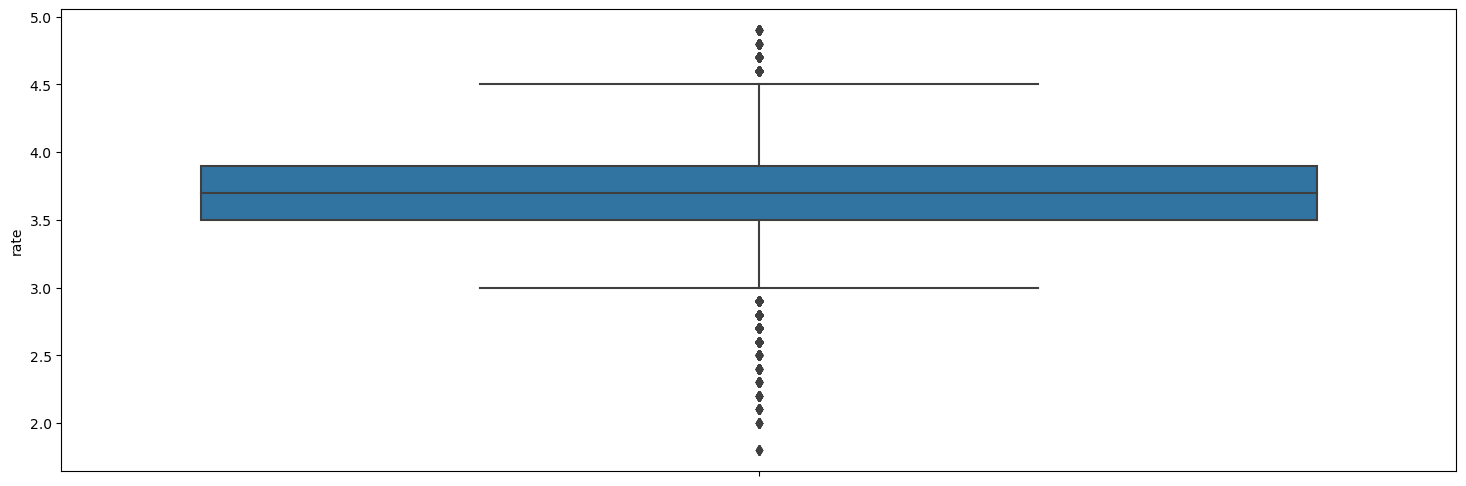

In [34]:
plt.figure(figsize=(18,6))
sns.boxplot(data = data, y=data["rate"]) 

Text(0, 0.5, 'Count')

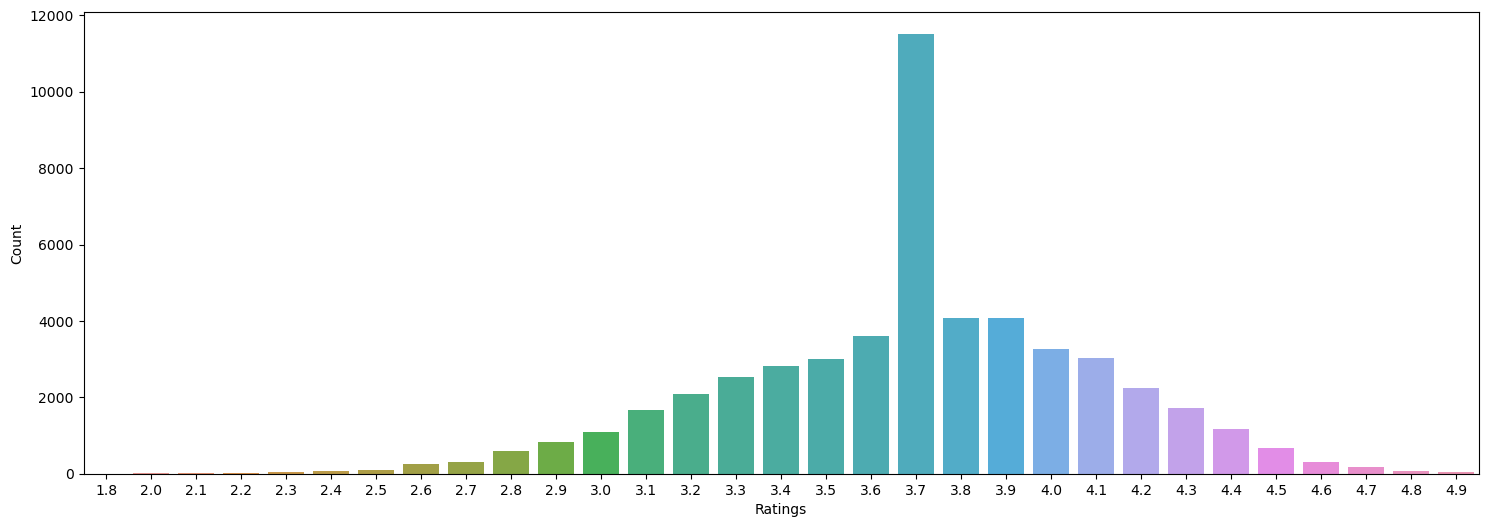

In [35]:
plt.figure(figsize=(18,6))
ratings = data["rate"].value_counts()
sns.barplot(x= ratings.index, y= ratings)
plt.xlabel("Ratings")
plt.ylabel("Count")

Based on our findings and understanding of the nature of the `rate` feature where we know that it is bounded by an interval from `0` to `5` and the up normal behaviour around the rating of `3.8` is due to the previous operations we did so far on that variable because of it's missing situation.

<AxesSubplot:ylabel='votes'>

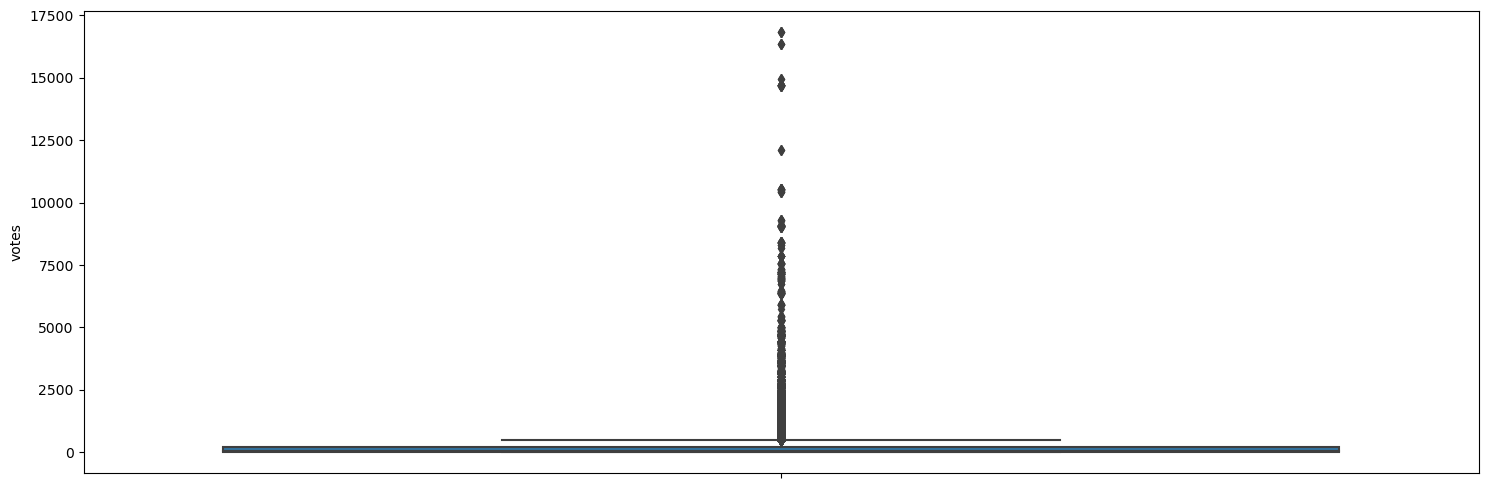

In [36]:
#Exploring the votes feature
plt.figure(figsize=(18,6))
sns.boxplot(data = data, y=data["votes"]) 

In [37]:
# Perfoming summary states that aids to more understanding of the distribution of the feature
data["votes"].describe()

count    51466.000000
mean       284.764408
std        805.597108
min          0.000000
25%          7.000000
50%         41.000000
75%        199.000000
max      16832.000000
Name: votes, dtype: float64

Numper of outliers: 6924 of 51466 Total Values 


<AxesSubplot:xlabel='votes', ylabel='Count'>

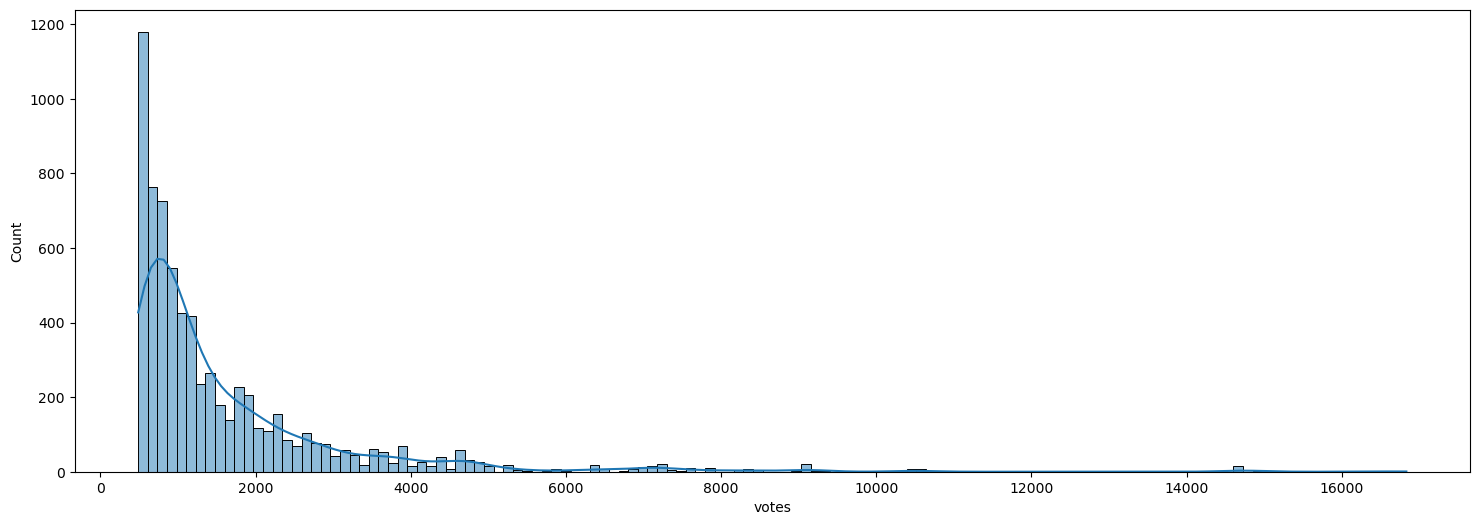

In [38]:
# Calculate quartiles and IQR
Q1 = data['votes'].quantile(0.25)
Q3 = data['votes'].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR  # Calculate the upper whisker

# Identify outliers (values greater than the upper whisker)
outliers = data[data["votes"] > upper_whisker]
print("Numper of outliers: {} of {} Total Values ".format(outliers['votes'].count(), data['votes'].count()))
plt.figure(figsize=(18,6))
sns.histplot(data= outliers['votes'], x=outliers['votes'] , kde =True)

Based on our opjective which is conduct a comperhensive market research we havo two options to deal with this outllier:
- **Model them separately:** where we can create a separate model to explain the outliers. 
- **Discretization**  where we can transform continuous numerical data into discrete bins or categories. 

**Here We go with** Discretization to handle our heavily skewed data and simplify analysis tasks. 
- Our binning strategie here incorporate each of **Summary stats** and the **IQR's**  and **Distribution anslysis** of the feature. 

In [39]:
# Define bin boundaries
bins = [data['votes'].min(), Q1, Q3, upper_whisker,  8000 ,data['votes'].max()]

# Define labels for the bins
labels = ['Low', 'Medium', 'High', 'Extreme', 'Supreme']

# Bin the data based on quartiles and whiskers
data['votes_bins'] = pd.cut(data['votes'], bins=bins, labels=labels)

# Analyze binned data
binned_counts = data['votes_bins'].value_counts().sort_index()

# Display summary statistics of binned data
print(binned_counts)

Low         3672
Medium     24994
High        5940
Extreme     6843
Supreme       81
Name: votes_bins, dtype: int64


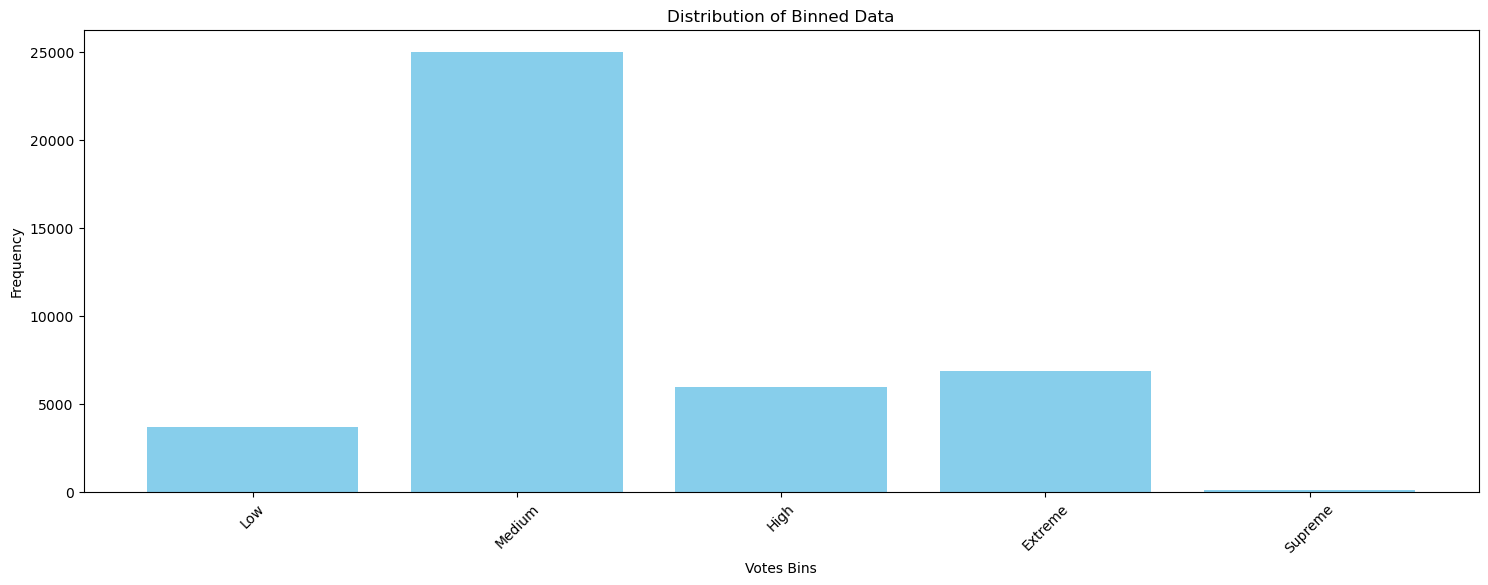

In [40]:
plt.figure(figsize=(18, 6))
plt.bar(binned_counts.index, binned_counts.values, color='skyblue')
plt.xlabel('Votes Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Binned Data')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:ylabel='approx_cost(for two people)'>

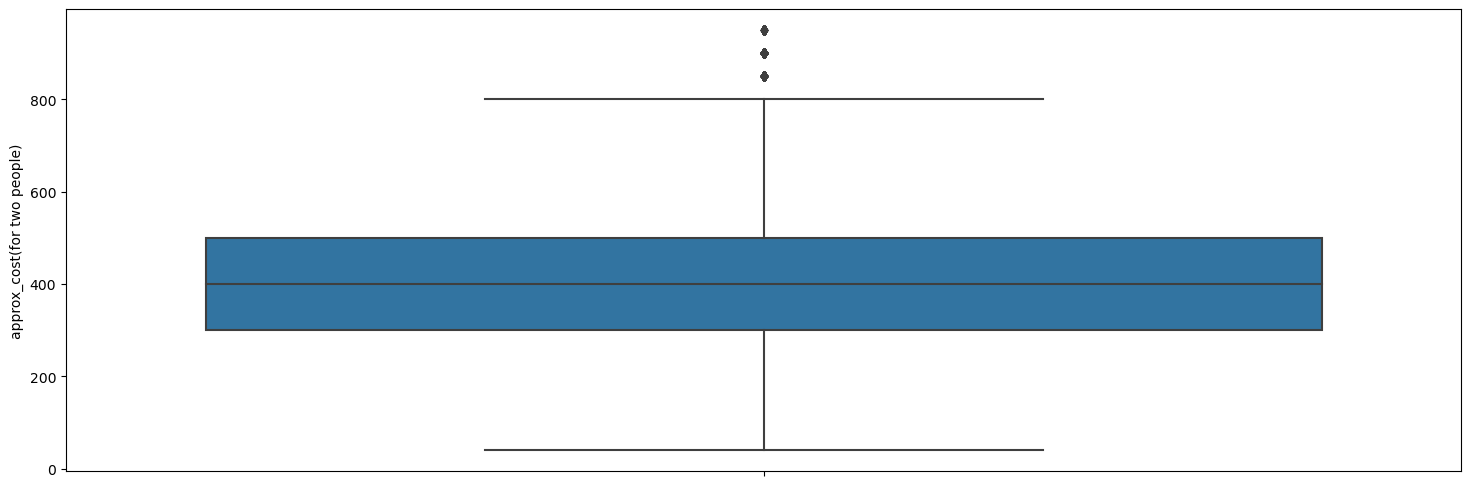

In [41]:
plt.figure(figsize=(18,6))
sns.boxplot(data = data, y=data["approx_cost(for two people)"]) 

<AxesSubplot:ylabel='menu_variety'>

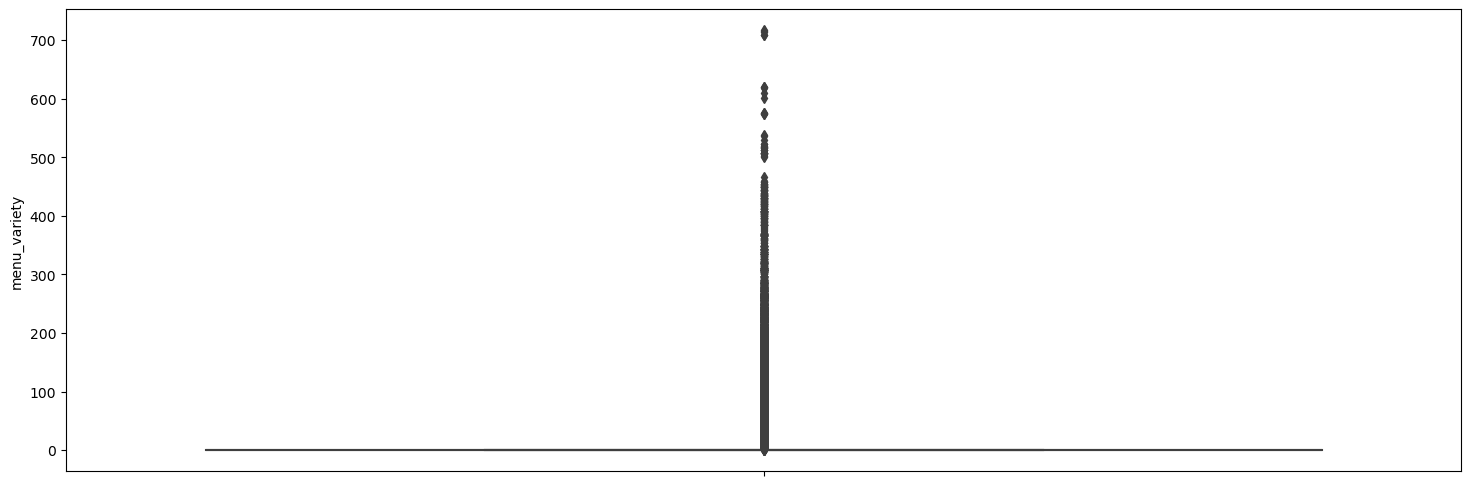

In [42]:
plt.figure(figsize=(18,6))
sns.boxplot(data = data, y=data["menu_variety"]) 

<AxesSubplot:xlabel='menu_variety', ylabel='Count'>

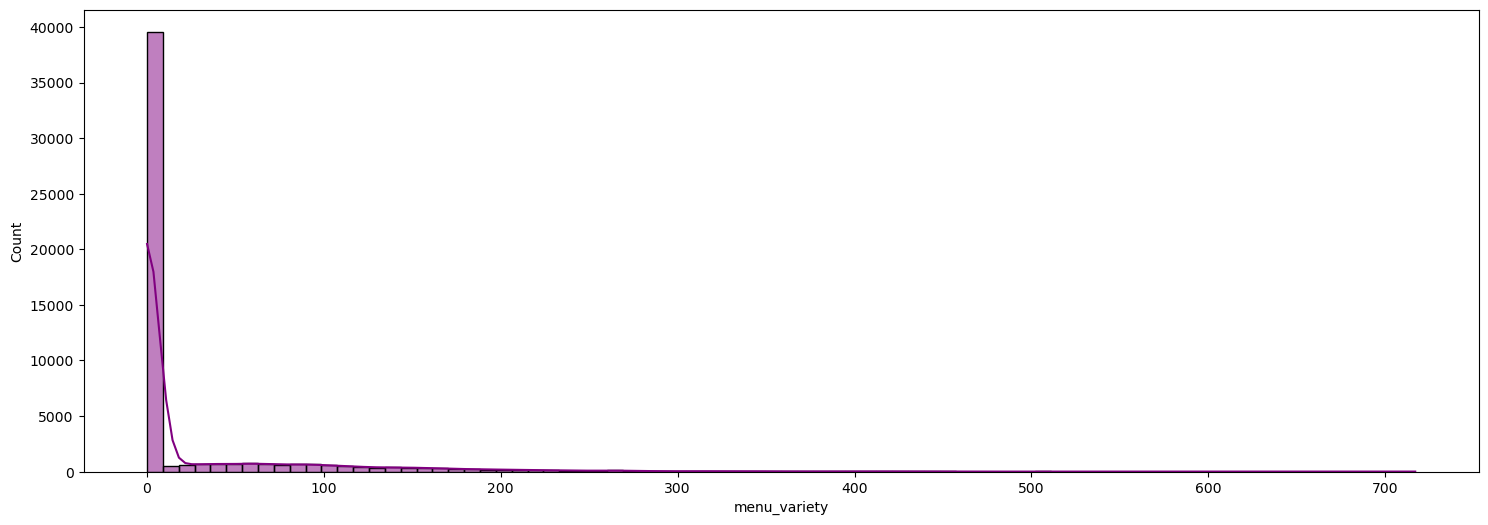

In [43]:
plt.figure(figsize=(18,6))
binned_menu_varity_counts = data['menu_variety'].value_counts().sort_index()
sns.histplot(data=data, x='menu_variety', bins=80, kde=True, color='purple')

In [44]:
data['menu_variety'].describe()

count    51466.000000
mean        25.254615
std         60.613423
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        717.000000
Name: menu_variety, dtype: float64

In [45]:
data["menu_variety"].value_counts()

0      39411
79        98
54        96
25        96
61        94
       ...  
398        1
281        1
467        1
345        1
573        1
Name: menu_variety, Length: 456, dtype: int64

##### Given that `approximately 75% of restaurants in your dataset lack a menu`, encoding a new feature to signify whether a restaurant has a menu `1` or not `0` becomes increasingly straightforward and effective.

In [46]:
# Create a new binary feature based on menu_variety column
data['has_menu'] = data['menu_variety'].apply(lambda x: 1 if x > 0 else 0)

### Duplication

> **Duplications** in our data are a critical concern as they can lead to **double-counting** errors, where the same data point or unit is counted more than once. Such errors can **introduce bias** into our results, **inflate estimates**, and result in unnecessary **resource consumption**.

##### Given that we're conducting market research on restaurants, we acknowledge the likelihood of duplications within our dataset. Our approach to handling these duplications varies depending on our analysis objectives and the nature of the features we possess. Here's our methodology:

- Initially, we conduct a comprehensive examination of duplications across the entire dataset.
- Next, we scrutinize the presence of duplications within each individual feature.
- Finally, based on our findings, we formulate a tailored strategy to effectively manage these duplications.

In [47]:
# Convert each list in the DataFrame to a string
#Duplicted_data['menu_item'] = data['menu_item'].apply(lambda x: str(x) if isinstance(x, list) else x)
Duplicted_data = data.drop(['menu_item'], axis=1)

# Find all duplicates
Duplicted_data.duplicated().sum()

0

In [48]:
for column in data.columns:
    duplicated_num = data[column].duplicated().sum()
    print("Number of duplicated values for {} is {}".format(column, duplicated_num))

Number of duplicated values for url is 0
Number of duplicated values for address is 40032
Number of duplicated values for name is 42711
Number of duplicated values for online_order is 51464
Number of duplicated values for book_table is 51464
Number of duplicated values for rate is 51435
Number of duplicated values for votes is 49138
Number of duplicated values for phone is 36606
Number of duplicated values for location is 51373
Number of duplicated values for rest_type is 51373
Number of duplicated values for cuisines is 48754
Number of duplicated values for approx_cost(for two people) is 51429
Number of duplicated values for reviews_list is 29034
Number of duplicated values for menu_item is 42403
Number of duplicated values for listed_in(type) is 51459
Number of duplicated values for listed_in(city) is 51436
Number of duplicated values for menu_variety is 51010
Number of duplicated values for votes_bins is 51460
Number of duplicated values for has_menu is 51464


In [49]:
# Assuming 'data' is your DataFrame
grouped_data = data.groupby('name')

grouped_data.agg({'address': 'count', 'location' : 'count', 'phone': 'count'})

,address,location,phone
name,,,
#FeelTheROLL,2,2,2
#L-81 Cafe,9,9,9
#Vibes Restro,3,3,3
#refuel,3,3,3
'Brahmins' Thatte Idli,1,1,1
...,...,...,...
late100,5,5,5
nu.tree,8,8,8
re:cess - Hilton Bangalore Embassy GolfLinks,3,3,3


In [50]:
grouped_data_1 = data.groupby(['name', 'address','location']).agg({'url':'count'})
grouped_data_1

url
name                                         address                                            location               
#FeelTheROLL                                 Opposite Mantri Commercio, Outer Ring Road, Dev... Bellandur             2
#L-81 Cafe                                   Sector 6, HSR Layout, HSR                          HSR                   9
#Vibes Restro                                Marasur Gate, Chandapura - Anekal Road, Near Al... Electronic City       3
#refuel                                      7, Ground Floor, RR Commercial Complex, Akshay ... Bannerghatta Road     3
'Brahmins' Thatte Idli                       19, 1st main, 2nd cross, 3rd stage, 3rd block, ... Basaveshwara Nagar    1
...                                                                                                                 ...
nu.tree                                      47/7 First floor, DoddaThogur Road, Near Velank... Electronic City       1
                                             Ground Floor-Lobby Area, Brigade IRV Centre, Na... Whitefield            3
re:cess - Hilton Bangalore Embassy GolfLinks Hilton Bangalore Embassy GolfLinks, Embassy Gol... Domlur                3
repEAT Hub                                   67/4, Bhoganahalli Road, JCR Layout, Panathur, ... Marathahalli          2
sCoolMeal                                    197/293-3, 32nd Main, 1st Stage, BTM, Bangalore    BTM                   5

[12457 rows x 1 columns]

- It's evident that our dataset contains prevalent duplicate entries for restaurants, with the same restaurant appearing multiple times under different records.
- This duplication poses a significant risk of introducing bias into our analyses and inflating our estimates.
- To mitigate this issue, it's crucial to revisit the data collection process and seek validation to understand the underlying reasons for this duplication. This will help us determine an appropriate treatment strategy to address the problem effectively.

### Now based on our findings we can formulate our strategy as follow:
- **Improved data quality:** Removing duplicates can ensure that our data is more accurate and representative of the true population of resturants we are studying.
- Based on the fact that each resturant must have one and only one unique compination of the features  `name `, `address`  and `location` we can set this as a criteria for our duplication elimination.
- We will group data based on our grouping craiteria above while aggrigating all other columns each based on it's nature.
- **Due to our limited access to the data collection process** We will compensate for that by Createing a duplication metric feature that indicate the duplicate cont for each unique compination.


### This framework retains all signal from duplicates without naively double-counting data points in the model.
### The duplication metrics can allow the model to account for duplicates if needed.
### The key advantage is reducing duplicated information and technical biases without losing information about the existence of duplicates.

In [51]:
# Find duplicates based on specific columns
duplicates_name_adress = data.duplicated(subset=['name', 'address', "location"])
duplicates_name_adress.sum()

39009

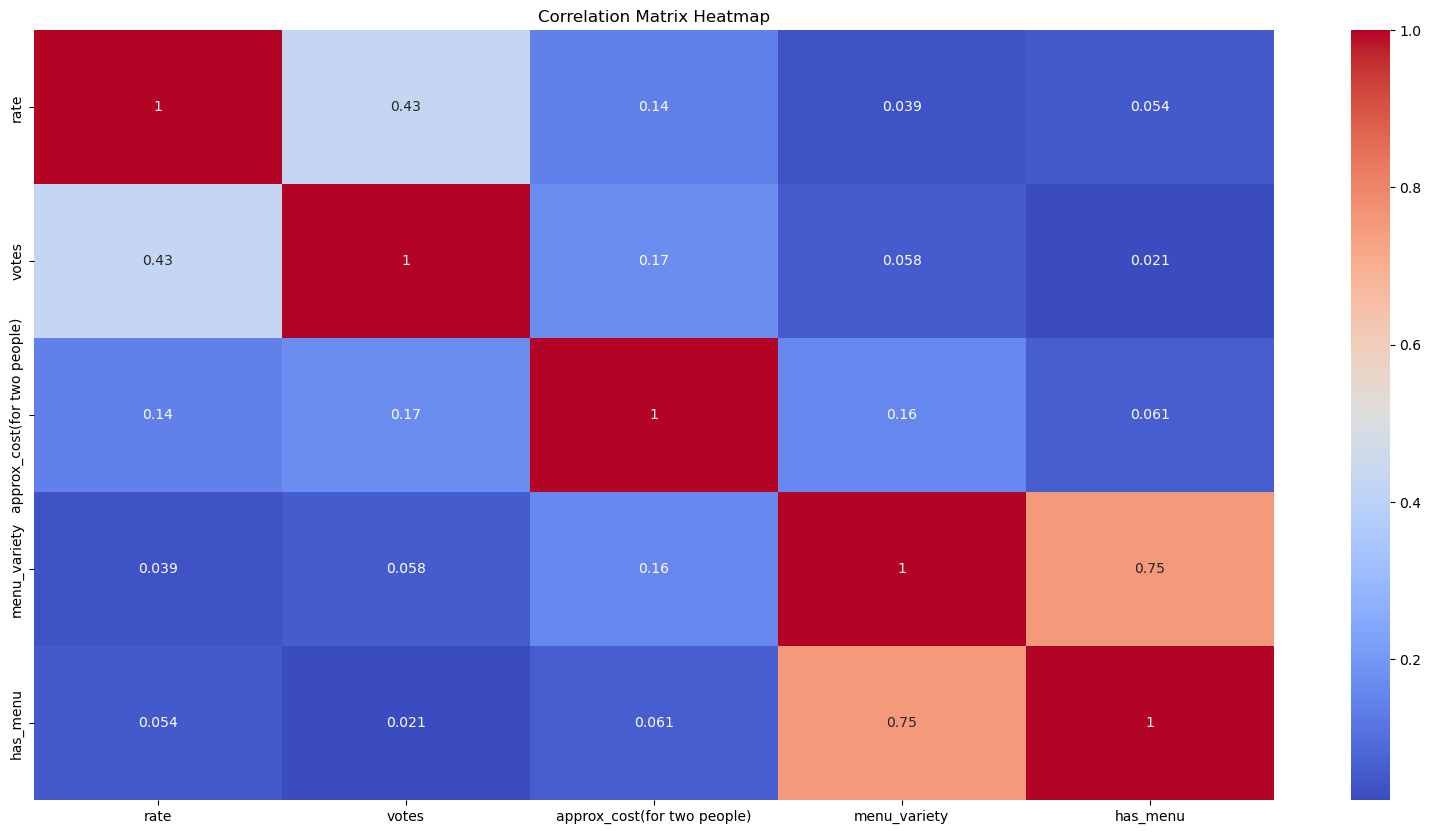

In [52]:
# Correlation matrix heatmap
def correlation_heatmap(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
        
        
correlation_heatmap(data)

In [53]:
# Group by name, address, phone, and location
data['duplicate_count'] = data.groupby(['name', 'address','location'])["url"].transform('count')

def Custom_moded(df):
    mode_series = df.mode()
    if mode_series.empty:
        return np.nan
    else:
        return mode_series.iloc[0]

data = data.groupby(['name', 'address', 'location']).agg({
        'online_order': Custom_moded,  # First mode of online_order
        'book_table': Custom_moded,  # First mode of book_table
        'rate': 'mean',  # Mean of rating
        'votes':  'mean',  # Mean of votes
        'rest_type': 'first',  # First value of rest_type
        'cuisines': 'first',  # First value of cuisines
        'approx_cost(for two people)':  'mean',  # Mean of approx_cost
        'reviews_list':'first',  # First value of reviews_list
        'menu_item': 'first',  # First value of menu_item
        'listed_in(type)': Custom_moded,  # Mode of listed_in(type)
        'listed_in(city)': Custom_moded,  # Mode of listed_in(city)
        'menu_variety': 'first',  # First of menu_variety
        'duplicate_count': 'first',   # First value of duplicate_count
        'has_menu': 'first',    # First of has_menu
        'votes_bins': Custom_moded  # Mode of votes_bins
}).reset_index() 

#Filling NAN values with appropriate category
data['votes_bins'].fillna('NoVotes', inplace=True)

data

,name,address,location,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),menu_variety,duplicate_count,has_menu,votes_bins
0,#FeelTheROLL,"Opposite Mantri Commercio, Outer Ring Road, De...",Bellandur,No,No,3.4,7.000000,Quick Bites,Fast Food,200.000000,"[('Rated 5.0', ""RATED\n Had an egg chicken ro...",[],Delivery,Bellandur,0,2,0,Low
1,#L-81 Cafe,"Sector 6, HSR Layout, HSR",HSR,Yes,No,3.9,48.000000,Quick Bites,"Fast Food, Beverages",400.000000,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Delivery,BTM,0,9,0,Medium
2,#Vibes Restro,"Marasur Gate, Chandapura - Anekal Road, Near A...",Electronic City,No,No,3.7,0.000000,Casual Dining,"Continental, Chinese, Italian",700.000000,"[('Rated 5.0', ""RATED\n Great service and don...",[],Buffet,Electronic City,0,3,0,NoVotes
3,#refuel,"7, Ground Floor, RR Commercial Complex, Akshay...",Bannerghatta Road,Yes,No,3.7,37.000000,Cafe,"Cafe, Beverages",400.000000,"[('Rated 3.0', 'RATED\n We ordered for Schezw...","[Kit Kat Thick Shake, Ferrero Rocher Thick Sha...",Cafes,Bannerghatta Road,145,3,1,Medium
4,'Brahmins' Thatte Idli,"19, 1st main, 2nd cross, 3rd stage, 3rd block,...",Basaveshwara Nagar,Yes,No,3.7,0.000000,Quick Bites,South Indian,100.000000,[],"[Masala Dosa, Set Dosa, Shavige Bhath, Puliyog...",Dine-out,Rajajinagar,16,1,1,NoVotes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,nu.tree,"47/7 First floor, DoddaThogur Road, Near Velan...",Electronic City,No,No,4.3,0.000000,Casual Dining,"North Indian, Healthy Food, Beverages",400.000000,[],[],Delivery,Electronic City,0,1,0,NoVotes
12453,nu.tree,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",Whitefield,Yes,No,4.3,177.666667,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400.000000,"[('Rated 5.0', 'RATED\n This is second time I...","[Fruit Porridge Meal, Dum Aloo and Chapathi Me...",Delivery,Brookefield,139,3,1,Medium
12454,re:cess - Hilton Bangalore Embassy GolfLinks,"Hilton Bangalore Embassy GolfLinks, Embassy Go...",Domlur,No,Yes,4.1,146.000000,"Casual Dining, Bar","South Indian, North Indian, Continental, European",416.630112,"[('Rated 5.0', ""RATED\n A big thanks for the ...",[],Dine-out,Old Airport Road,0,3,0,Medium
12455,repEAT Hub,"67/4, Bhoganahalli Road, JCR Layout, Panathur,...",Marathahalli,No,No,3.7,0.000000,Quick Bites,"North Indian, South Indian, Juices",200.000000,"[('Rated 5.0', 'RATED\n Cook has great experi...",[],Delivery,Marathahalli,0,2,0,NoVotes


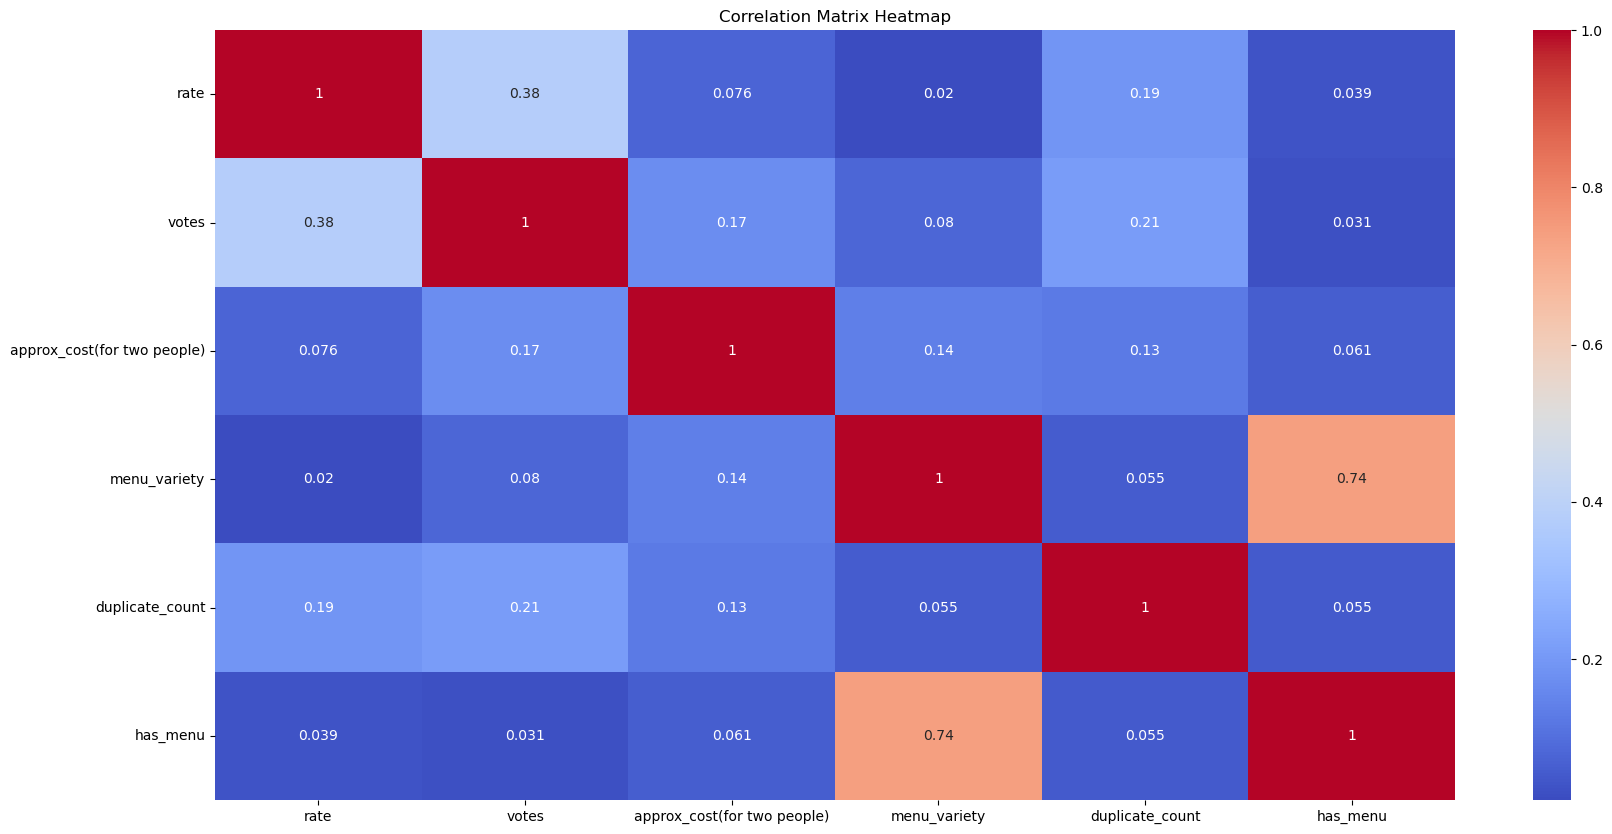

In [54]:
# Correlation matrix heatmap
def correlation_heatmap(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(20, 10))
    sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()
        
        
correlation_heatmap(data)

### We selected pertinent columns essential for analysis in EDA and model development, discarding irrelevant ones like Phone numbers and so on.

In [55]:
# Saveing Our prepared data to a CSV file named "Restaurants.csv" without including the index.
data = data.reset_index(drop=True)  # Reset index without adding it as a column
data.to_csv("Restaurants.csv", index=False)  # Save to CSV without including the index

*****************

## Grateful for your time going through this kernel! 🔍 Any feedback or improvements are more than welcomed!